# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('onlinefraud1.csv')
X = dataset.iloc[:, 3:-2].values
y = dataset.iloc[:, -2].values

In [ ]:
print(X)

[['PAYMENT' 9839.64 170136.0 160296.36 0.0 0.0]
 ['PAYMENT' 1864.28 21249.0 19384.72 0.0 0.0]
 ['TRANSFER' 181.0 181.0 0.0 0.0 0.0]
 ...
 ['PAYMENT' 14140.05 20545.0 6404.95 0.0 0.0]
 ['PAYMENT' 10020.05 90605.0 80584.95 0.0 0.0]
 ['PAYMENT' 11450.03 80584.95 69134.92 0.0 0.0]]


In [ ]:
print(y)

[0 0 1 ... 0 0 0]


### Encoding categorical data

One Hot Encoding the "type" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 0.0 ... 160296.36 0.0 0.0]
 [0.0 0.0 0.0 ... 19384.72 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 6404.95 0.0 0.0]
 [0.0 0.0 0.0 ... 80584.95 0.0 0.0]
 [0.0 0.0 0.0 ... 69134.92 0.0 0.0]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target values
y_train = to_categorical(y_train, num_classes=3)  # Assuming 3 classes
y_test = to_categorical(y_test, num_classes=3)    # Do the same for y_test if you are using it for validation


In [ ]:
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 2/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 3/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9993 - loss: 0.0035
Epoch 4/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 5/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9994 - loss: 0.0029


## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)

10814/10814 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
# Convert predicted probabilities to class labels
y_pred_flat = np.argmax(y_pred, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Extract the maximum probability for each prediction (i.e., the confidence of the predicted class)
max_probabilities = np.max(y_pred, axis=1)

# Create a DataFrame with the actual values, predicted values, and their probabilities
predictions_df = pd.DataFrame({
    'Actual': y_test_flat,           # Actual class labels from the test set
    'Predicted': y_pred_flat,        # Predicted class labels
    'Probability': max_probabilities # Maximum probability for each predicted class
})

# Save the DataFrame to a new CSV file
predictions_df.to_csv('predictions3.csv', index=False)

print("Predictions saved to 'predictions3.csv'")


Predictions saved to 'predictions3.csv'


### Making the Confusion Matrix

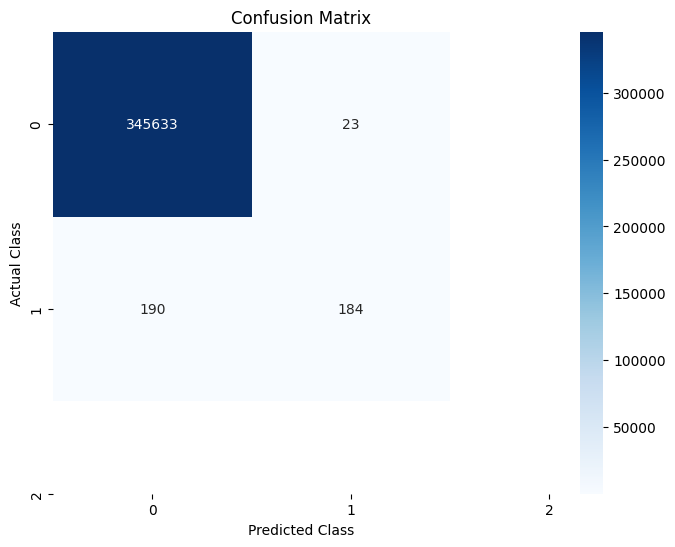

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_flat, y_pred_flat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()
